<h1>Medical Insurance Cost Prediction</h1>

<h1>What is the dataset about?</h1>
    <p>The dataset contains information about people and their medical expenses (insurance charges). It has factors like:</p>
    <ul>
        <li><strong>Age</strong> (how old someone is)</li>
        <li><strong>Sex</strong> (gender)</li>
        <li><strong>BMI</strong> (Body Mass Index)</li>
        <li><strong>Children</strong> (how many children they have)</li>
        <li><strong>Smoker</strong> (whether they smoke or not)</li>
        <li><strong>Region</strong> (where they live)</li>
        <li><strong>Charges</strong> (the medical cost or insurance charge)</li>
    </ul>
    <p>This data is used to predict how much a new person might pay for medical insurance based on their details.</p>
    <h2>Problem Statement:</h2>
    <ol>
        <li><strong>What factors impact medical expenses the most?</strong><br>
            We want to know which factors, like age or smoking, have the biggest effect on medical costs.</li>
        <li><strong>How accurate can we predict medical expenses?</strong><br>
            We will build a machine learning model to predict how much someone will pay based on their data (age, smoking, etc.) and see how accurate the predictions are.</li>
        <li><strong>How can machine learning help health insurance companies?</strong><br>
            By making accurate predictions, insurance companies can price policies better and reduce risks, which can help them be more profitable and efficient.</li>
    </ol>
    <h3>In short:</h3>
    <p>The dataset helps us understand which factors influence medical expenses and how machine learning models can predict these expenses accurately to help insurance companies make better decisions.</p>

In [150]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import preprocessing as ps


In [151]:
df=pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [178]:
df.sample(2)

,age,sex,bmi,children,smoker,region,charges
2692,29,female,21.85,0,yes,northeast,16115.30450
2398,61,female,33.33,4,no,southeast,36580.28216


In [153]:
#preliminary  data overview
ps.dataset_analysis(df,target_column='charges')

Dataset Shape (Rows & Columns)
Rows :- 2772
Columns :- 7
Unique Rows: 1337 (48.23%)
Duplicate Rows: 1435 (51.77%)

Columns with Null Values and Null Value Counts
No columns contain null values.

Data Type Wise Column Count
object     3
int64      2
float64    2
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : sex, smoker, region


Discrete Numeric Columns : age, children


Continuous Columns : bmi, charges


Unknown Columns : -----

Skewness of Numerical Columns
bmi: 0.28 -> Approximately Symmetric. 
charges: 1.51 -> Strong Positive Skew. Consider transformation (e.g., log or square root)

Constant Unique Values in Categorical Columns

Unique Values in Categorical Columns
sex: ['female', 'male']

smoker: ['no', 'yes']

region: ['northeast', 'northwest', 'southeast', 'southwest']

age: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 

From Above Analysis We got result that

1. we have avg 50% duplicates row which we discarding from dataset
2. we dont have any null value which good sign
3. target variable (Charges) is skew right so we need transform so that its contribution in prediction not get bias

In [154]:
print('Total Records : - ',df.shape[0],'\t Duplicateed Records :- ', df[df.duplicated()].shape[0])
df1 = df.drop_duplicates()
print('After Drop Duplicate Total Records : - ',df1.shape[0])

Total Records : -  2772 	 Duplicateed Records :-  1435
After Drop Duplicate Total Records : -  1337


<h3>EDA</h3>

In [155]:
#check Data Type Correctly aasign to each column or not
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [156]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1337.0,NaN,NaN,NaN,39.222139,14.044333,18.0,27.0,39.0,51.0,64.0
sex,1337,2,male,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1337.0,NaN,NaN,NaN,30.663452,6.100468,15.96,26.29,30.4,34.7,53.13
children,1337.0,NaN,NaN,NaN,1.095737,1.205571,0.0,0.0,1.0,2.0,5.0
smoker,1337,2,no,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1337,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1337.0,NaN,NaN,NaN,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [157]:

#create bin for age and bin for get more insights in visulization
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

bmi_bins = [0, 18.5, 24.9, 29.9, 39.9, 50, 70]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese', 'Very Severely Obese']
df1['bmi_group'] = pd.cut(df1['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

df1.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,0-20,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,0-20,Obese
2,28,male,33.000,3,no,southeast,4449.46200,21-30,Obese
3,33,male,22.705,0,no,northwest,21984.47061,31-40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight


<h3>Univarite Analysis</h3>

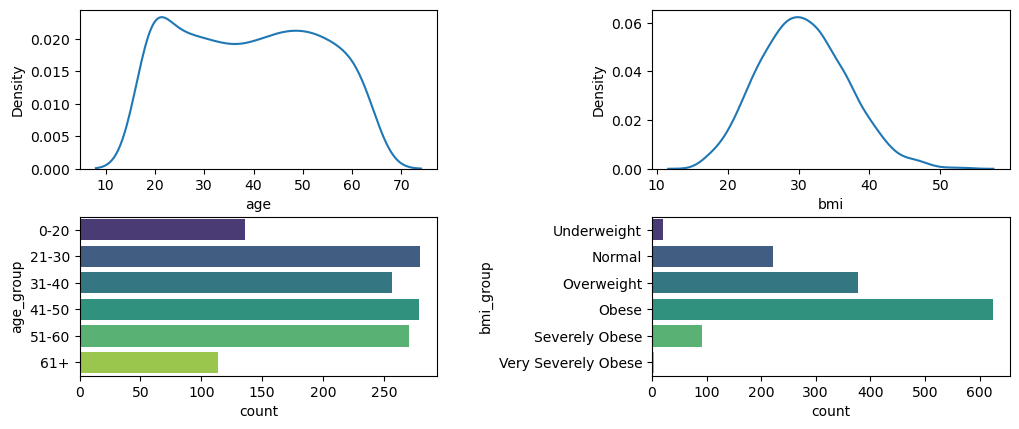

In [158]:
plt.figure(figsize=(12,10))

plt.subplot(4,2,1)
sns.kdeplot(x='age', data=df1, palette='viridis')


plt.subplot(4,2,2)
sns.kdeplot(x='bmi', data=df1, palette='viridis')

plt.subplot(4,2,3)
sns.countplot(y='age_group', data=df1, palette='viridis')



plt.subplot(4,2,4)
sns.countplot(y='bmi_group',data=df1, palette='viridis',width=0.8)


plt.subplots_adjust(hspace=0.3, wspace=0.6, bottom=0.1)  # Increase bottom margin

plt.show()




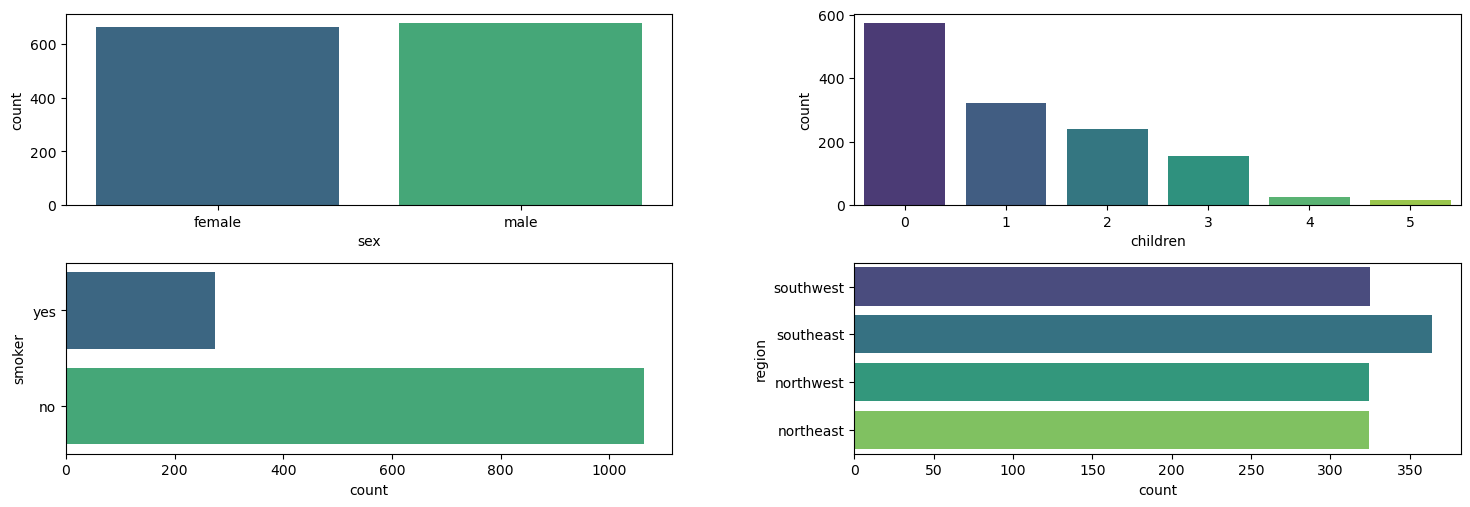

In [159]:
plt.figure(figsize=(18,12))

plt.subplot(4,2,1)
sns.countplot(x='sex', data=df1, palette='viridis')


plt.subplot(4,2,2)
sns.countplot(x='children', data=df1, palette='viridis')

plt.subplot(4,2,3)
sns.countplot(y='smoker', data=df1, palette='viridis')



plt.subplot(4,2,4)
sns.countplot(y='region',data=df1, palette='viridis',width=0.8)


plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.1)  # Increase bottom margin

plt.show()




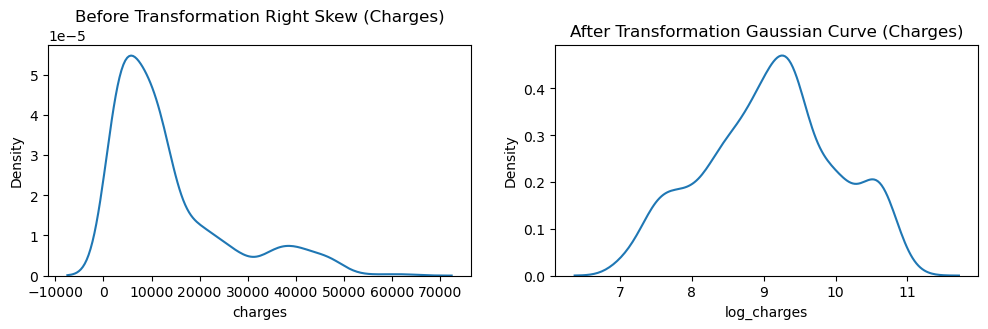

In [160]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
sns.kdeplot(x='charges', data=df1, palette='viridis')
plt.title('Before Transformation Right Skew (Charges)')

df1['log_charges']=np.log(df1['charges'])


plt.subplot(1,2,2)
sns.kdeplot(x='log_charges', data=df1, palette='viridis')
plt.title('After Transformation Gaussian Curve (Charges)')

plt.show()

<h3>Bivariate Analysis</h3>

In [161]:
df1.corr(numeric_only=True)['charges']

age            0.298308
bmi            0.198401
children       0.067389
charges        1.000000
log_charges    0.893084
Name: charges, dtype: float64

<h3>Here we Try undetstand is their any singnificant relationship between variables or not with help of statiscal techinques</h3>

Is smoker high influernce variable to medical charges?

To assess whether smoker is a significant influence on medical charges using a hypothesis testing technique, you can perform a two-sample t-test. 

Null Hypothesis (H₀): Smoking has no effect on medical charges. (The mean medical charges of smokers and non-smokers are the same.)


Alternative Hypothesis (H₁): Smoking does affect medical charges. (The mean medical charges of smokers and non-smokers are different.)




In [162]:
# Assuming df1 is your DataFrame
smokers = df1[df1['smoker'] == 'yes']['log_charges']
non_smokers = df1[df1['smoker'] == 'no']['log_charges']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(smokers, non_smokers)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Smoking has a significant effect on medical charges.")
else:
    print("Fail to reject the null hypothesis: No significant effect of smoking on medical charges.")

T-statistic: 32.59668796883839
P-value: 6.025059226607085e-172
Reject the null hypothesis: Smoking has a significant effect on medical charges.


In [163]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group', 'bmi_group', 'log_charges'],
      dtype='object')

In [164]:
import pandas as pd
from scipy import stats

# Function to perform ANOVA or two-sample t-test based on the number of categories
def test_categorical_effect(df, cat_col, cont_col, alpha=0.05):
    """
    Perform a t-test (for two categories) or ANOVA (for more than two categories) 
    to see if a categorical variable affects a continuous variable.
    
    Parameters:
    - df: DataFrame containing the data
    - cat_col: The name of the categorical column (as a string)
    - cont_col: The name of the continuous column (as a string)
    - alpha: The significance level (default is 0.05)
    
    Prints the results of the test and interpretation.
    """
    
    # Get the unique categories in the categorical column
    categories = df[cat_col].unique()
    
    # Check if there are two categories or more
    if len(categories) == 2:
        # Two-sample t-test (for exactly two categories)
        group1 = df[df[cat_col] == categories[0]][cont_col]
        group2 = df[df[cat_col] == categories[1]][cont_col]
        
        # Perform a two-sample t-test
        t_stat, p_value = stats.ttest_ind(group1, group2)
        
        # Display the results
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        
        # Interpret the p-value
        if p_value < alpha:
            print(f"Reject the null hypothesis: {cat_col} has a significant effect on {cont_col}.")
        else:
            print(f"Fail to reject the null hypothesis: No significant effect of {cat_col} on {cont_col}.")
    
    else:
        # ANOVA (for more than two categories)
        # Group the data by category
        grouped_data = [df[df[cat_col] == category][cont_col] for category in categories]
        
        # Perform ANOVA
        f_stat, p_value = stats.f_oneway(*grouped_data)
        
        # Display the results
        print(f"F-statistic: {f_stat}")
        print(f"P-value: {p_value}")
        
        # Interpret the p-value
        if p_value < alpha:
            print(f"Reject the null hypothesis: {cat_col} has a significant effect on {cont_col}.")
        else:
            print(f"Fail to reject the null hypothesis: No significant effect of {cat_col} on {cont_col}.")

test_categorical_effect(df1, 'smoker', 'log_charges') 
print('='*50)
test_categorical_effect(df1, 'region', 'log_charges')  
print('='*50)
test_categorical_effect(df1, 'children', 'log_charges')  
print('='*50)
test_categorical_effect(df1, 'sex', 'log_charges')  

T-statistic: 32.59668796883839
P-value: 6.025059226607085e-172
Reject the null hypothesis: smoker has a significant effect on log_charges.
F-statistic: 1.36851873127043
P-value: 0.25078497585938436
Fail to reject the null hypothesis: No significant effect of region on log_charges.
F-statistic: 9.211788401854895
P-value: 1.2426940117468437e-08
Reject the null hypothesis: children has a significant effect on log_charges.
T-statistic: -0.25611399919713707
P-value: 0.7979022708502552
Fail to reject the null hypothesis: No significant effect of sex on log_charges.


<strong>as u can see that smoker and children have singificant relationship with medical charges rather than sex and region.</strong>

In [165]:

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
labelencoder = LabelEncoder()

# Apply Label Encoding to the columns
df1['sex'] = labelencoder.fit_transform(df1['sex'])
df1['smoker'] = labelencoder.fit_transform(df1['smoker'])
df1['region'] = labelencoder.fit_transform(df1['region'])


df1.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,log_charges
0,19,0,27.900,0,1,3,16884.92400,0-20,Overweight,9.734176
1,18,1,33.770,1,0,2,1725.55230,0-20,Obese,7.453302
2,28,1,33.000,3,0,2,4449.46200,21-30,Obese,8.400538
3,33,1,22.705,0,0,1,21984.47061,31-40,Normal,9.998092
4,32,1,28.880,0,0,1,3866.85520,31-40,Overweight,8.260197


In [166]:
df1=df1.drop(['age_group','bmi_group'],axis=1)

In [167]:
df1.corr()['charges']

age            0.298308
sex            0.058044
bmi            0.198401
children       0.067389
smoker         0.787234
region        -0.006547
charges        1.000000
log_charges    0.893084
Name: charges, dtype: float64

In [168]:
df2=df1[['age','bmi','children','smoker','charges']]
df2.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [169]:
'''from  sklearn.preprocessing import StandardScaler

std=StandardScaler()

df2.iloc[:,:-1]=std.fit_transform(df2.iloc[:,:-1])
df2.head()'''

'from  sklearn.preprocessing import StandardScaler\n\nstd=StandardScaler()\n\ndf2.iloc[:,:-1]=std.fit_transform(df2.iloc[:,:-1])\ndf2.head()'

In [170]:
x=df2.iloc[:,:-1]
y=df2['charges']

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [172]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Train Model Function (updated for regression)
def train_model(model, model_name, x_train, y_train, x_test, y_test, is_classification=True):
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on the training data
    y_train_pred = model.predict(x_train)
    # Predictions on the testing data
    y_test_pred = model.predict(x_test)
    
    # Collecting results in a dictionary
    model_results = {
        'model': model_name
    }
    
    if is_classification:
        # Classification metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        model_results['train_accuracy'] = train_accuracy
        model_results['test_accuracy'] = test_accuracy
        
        # Generate classification report for testing data (optional)
        report = classification_report(y_test, y_test_pred, output_dict=True)
        model_results['classification_report'] = report
    else:
        # Regression metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        model_results['train_mse'] = train_mse
        model_results['test_mse'] = test_mse
        model_results['train_r2'] = train_r2
        model_results['test_r2'] = test_r2
    
    return model_results

# List of models (for regression or classification tasks)
model_list = dict(
    linear_regression=LinearRegression(),
    ridge=Ridge(alpha=1.0),
    lasso=Lasso(alpha=0.1),
    svr=SVR(kernel='rbf'),
    decision_tree=DecisionTreeRegressor(random_state=42),
    random_forest=RandomForestRegressor(n_estimators=50, random_state=42),
    xgboost=xgb.XGBRegressor(max_depth=1),
    catboost=cb.CatBoostRegressor(iterations=100, learning_rate=0.01, depth=3, verbose=0),
    gradientboost=GradientBoostingRegressor(n_estimators=100, random_state=42),
    adaboost=AdaBoostRegressor(n_estimators=100, random_state=42),  # Added AdaBoost
    lightgbm=lgb.LGBMRegressor(n_estimators=100, random_state=42)  # Added LightGBM
)

# Assume you have your x_train, x_test, y_train, and y_test already defined
results = []
for key, value in model_list.items():
    # Check if classification or regression model and train accordingly
    is_classification =False  # change as per your use-case for classification vs regression
    model_results = train_model(value, key, x_train, y_train, x_test, y_test, is_classification)
    results.append(model_results)

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Print or return the results DataFrame
results_df


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 4
[LightGBM] [Info] Start training from score 13016.651839


,model,train_mse,test_mse,train_r2,test_r2
0,linear_regression,3.607389e+07,3.882431e+07,0.732216,0.771757
1,ridge,3.607776e+07,3.899788e+07,0.732187,0.770736
2,lasso,3.607389e+07,3.882501e+07,0.732216,0.771753
3,svr,1.485254e+08,1.904420e+08,-0.102534,-0.119585
4,decision_tree,2.721106e+02,3.484967e+07,0.999998,0.795123
5,random_forest,3.645192e+06,2.456392e+07,0.972941,0.855592
6,xgboost,3.247958e+07,4.061127e+07,0.758897,0.761251
7,catboost,4.126251e+07,5.139292e+07,0.693700,0.697867
8,gradientboost,1.336712e+07,2.231613e+07,0.900773,0.868806
9,adaboost,2.487836e+07,2.969421e+07,0.815323,0.825431


In [173]:
gradientboost = GradientBoostingRegressor(n_estimators=100, random_state=0)
gradientboost.fit(x_train, y_train)
# Get the feature importances
importances = gradientboost.feature_importances_

# Get feature names
features = x.columns

# Create a DataFrame to display feature importances
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(feature_importance_df.head())

    Feature  Importance
3    smoker    0.662401
1       bmi    0.195250
0       age    0.131131
2  children    0.011217


In [179]:
import pickle
model = GradientBoostingRegressor(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

with open('medical_insurance_cost_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [175]:
y_train

1037    39725.51805
467     12643.37780
39      48173.36100
30      35585.57600
242     35160.13457
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 895, dtype: float64